# LAB-8
BL.EN.U4AIE21034

Mithul

A1. Use LSTM, Bi-LSTM networks for speech recognition. Use STFT / STCT, MFCC & LPC coefficients.

In [1]:
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
import matplotlib.pyplot as plt
import librosa.display

In [2]:
def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=16000)
    stft = np.abs(librosa.stft(audio, n_fft=400, hop_length=160))
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    lpc = librosa.lpc(y=audio, order=12)
    return audio, sr, stft, mfccs, lpc

In [3]:
def process_data(file_paths):
    audios, srs, stfts, mfccs, lpcs = [], [], [], [], []
    for file_path in file_paths:
        audio, sr, stft, mfcc, lpc = extract_features(file_path)
        audios.append(audio)
        srs.append(sr)
        stfts.append(stft)
        mfccs.append(mfcc)
        lpcs.append(lpc)
    return np.array(audios), np.array(srs), np.array(stfts), np.array(mfccs), np.array(lpcs)

In [4]:
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(128, input_shape=input_shape, return_sequences=True),
        Dropout(0.3),
        LSTM(128, return_sequences=True),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [5]:
def build_bilstm_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(128, input_shape=input_shape, return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(128, return_sequences=True)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [6]:
audio_file_path = "bhanumatiwedsrajat.wav"
audio, sr, stft_data, mfcc_data, lpc_data = extract_features(audio_file_path)
stft_data = stft_data.reshape(1, stft_data.shape[0], stft_data.shape[1])
mfcc_data = mfcc_data.reshape(1, mfcc_data.shape[0], mfcc_data.shape[1])
lpc_data = lpc_data.reshape(1, lpc_data.shape[0])

In [7]:
lstm_model = build_lstm_model(stft_data.shape[1:])
bilstm_model = build_bilstm_model(stft_data.shape[1:])
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_predictions = lstm_model.predict(stft_data)
bilstm_predictions = bilstm_model.predict(stft_data)



1/1 [==============================] - 3s 3s/step


In [8]:
print("Sampling rate (sr):", sr)
print("Number of FFT points (n_fft):", stft_data.shape[1])
print("Shape of stft_data:", stft_data.shape)

Sampling rate (sr): 16000
Number of FFT points (n_fft): 201
Shape of stft_data: (1, 201, 508)


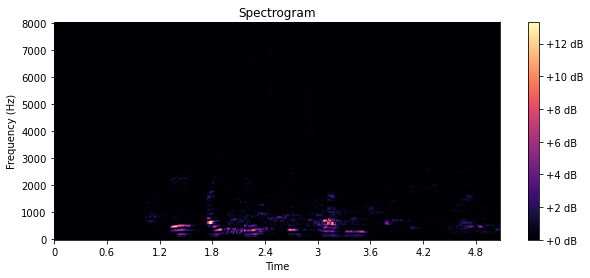

In [9]:
# Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(stft_data[0], sr=sr, hop_length=160, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.show()

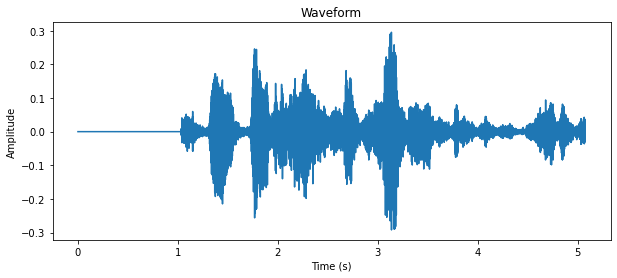

In [10]:
# Waveform
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(audio)) / float(sr), audio)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

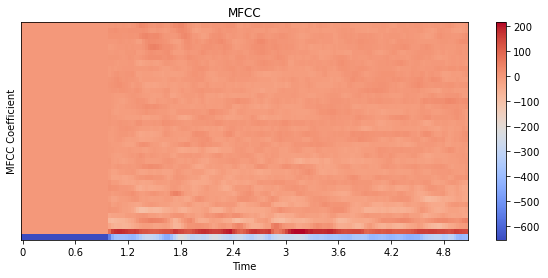

In [11]:
# MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_data[0], sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficient')
plt.show()

A2. Speak the sentence “Bhanumathi weds Rajat” (भानुमति वेड्स रजि || భానుమతి వెడ్స్ రజత్). 
Construct speech for the word “Bharat” (భారత్ || भारत || ಭರತ್ || பாரத்) by combining 
segmented phonemes taken from “Bhanumathi weds Rajat” speech recording. Listen to this word 
speech generated and note down the issues associated with this approach of speech synthesis. The 
string written Indian scripts may have some error. Please validate before using.

In [12]:
import os
import tempfile
import speech_recognition as sr
import pyttsx3
import matplotlib.pyplot as plt
import numpy as np
import librosa

In [13]:
custom_temp_dir =  r"C:\Users\virin\Downloads\LAB-8"
def segment_phonemes(transcription, target_word):
    words = transcription.split()
    for word in words:
        if word.lower() == target_word.lower():
            return word
def synthesize_word(phonemes, output_file):
    engine = pyttsx3.init()
    engine.save_to_file(phonemes, output_file)
    engine.runAndWait()

In [14]:
audio_file = "Hari-77.wav"
recognizer = sr.Recognizer()
with sr.AudioFile(audio_file) as source:
    audio_data = recognizer.record(source)
transcription = recognizer.recognize_google(audio_data)

In [15]:
phonemes = segment_phonemes(transcription, "Bharat")
output_file = os.path.join(custom_temp_dir, "bharat_speech.wav")
synthesize_word(phonemes, output_file)
plt.figure(figsize=(10, 6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

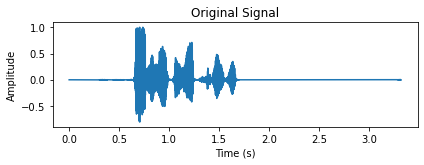

In [20]:
# Original signal
plt.subplot(2, 1, 1)
plt.title('Original Signal')
audio_data_np, _ = librosa.load(audio_file, sr=source.SAMPLE_RATE)
plt.plot(np.linspace(0, len(audio_data_np) / source.SAMPLE_RATE, num=len(audio_data_np)), audio_data_np)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

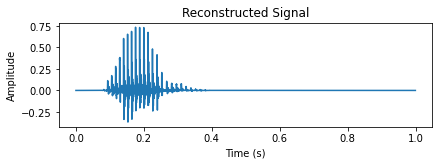

In [21]:
# Reconstructed signal
reconstructed_audio_data, _ = librosa.load(output_file, sr=source.SAMPLE_RATE)
plt.subplot(2, 1, 2)
plt.title('Reconstructed Signal')
plt.plot(np.linspace(0, len(reconstructed_audio_data) / source.SAMPLE_RATE, num=len(reconstructed_audio_data)), reconstructed_audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()